# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date

        })
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | broken hill
Processing Record 4 of Set 1 | santa maria de jetiba
City not found. Skipping...
Processing Record 5 of Set 1 | bonthe
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | acarau
Processing Record 9 of Set 1 | weno
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | timbuktu
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | ceeldheer
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | waitangi
Proc

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,1.45,60,0,3.09,US,1734283529
1,puerto natales,-51.7236,-72.4875,19.25,45,75,10.29,CL,1734283531
2,broken hill,-31.9500,141.4333,30.78,17,8,5.17,AU,1734283532
3,bonthe,7.5264,-12.5050,30.16,61,5,5.71,SL,1734283535
4,wailua homesteads,22.0669,-159.3780,22.44,94,75,4.63,US,1734283536


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,1.45,60,0,3.09,US,1734283529
1,puerto natales,-51.7236,-72.4875,19.25,45,75,10.29,CL,1734283531
2,broken hill,-31.9500,141.4333,30.78,17,8,5.17,AU,1734283532
3,bonthe,7.5264,-12.5050,30.16,61,5,5.71,SL,1734283535
4,wailua homesteads,22.0669,-159.3780,22.44,94,75,4.63,US,1734283536


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

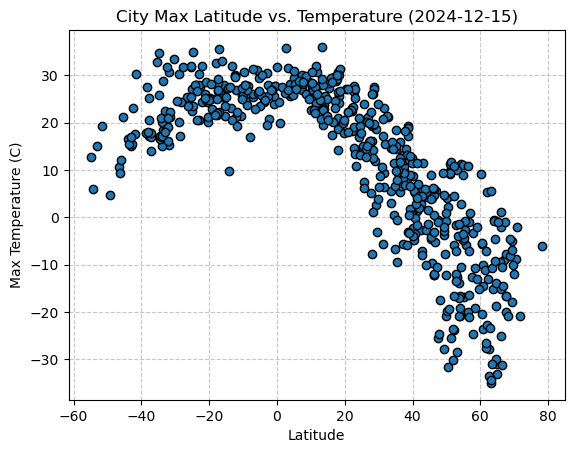

In [29]:
from datetime import datetime
from scipy import stats

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

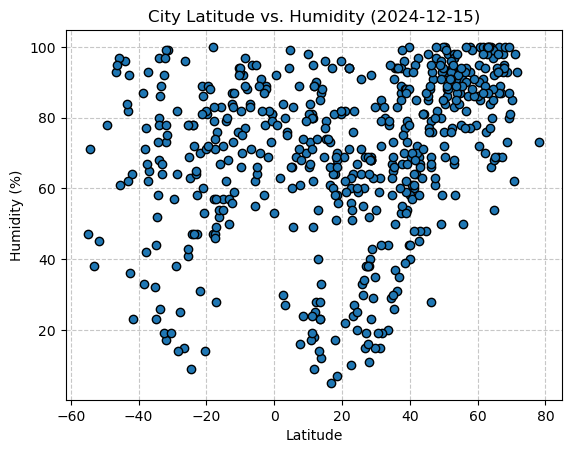

In [31]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

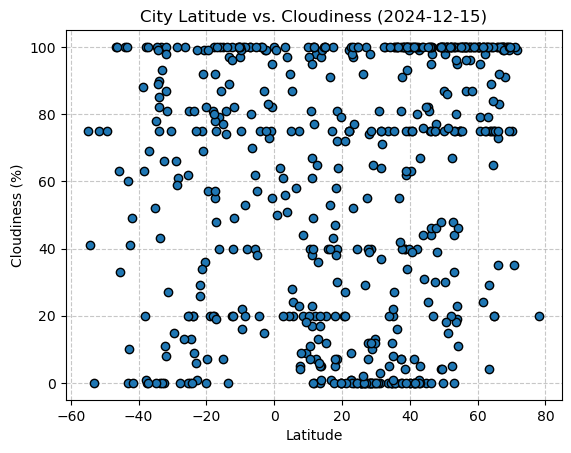

In [33]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']


# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

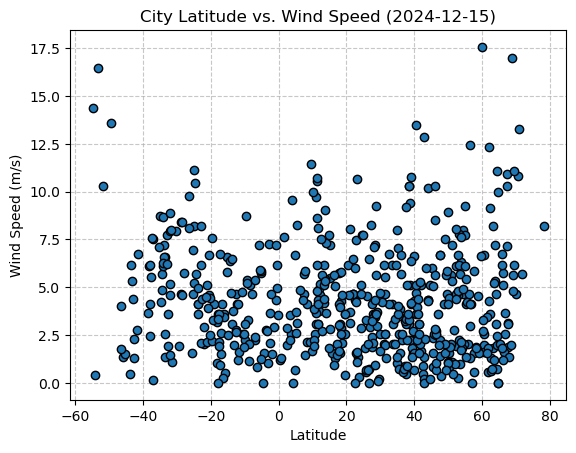

In [35]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


r-value  :  0.7745966692414835 
p-value  :  0.12402706265755442 
std-error:  0.28284271247461895
y = 0.6x + 2.2


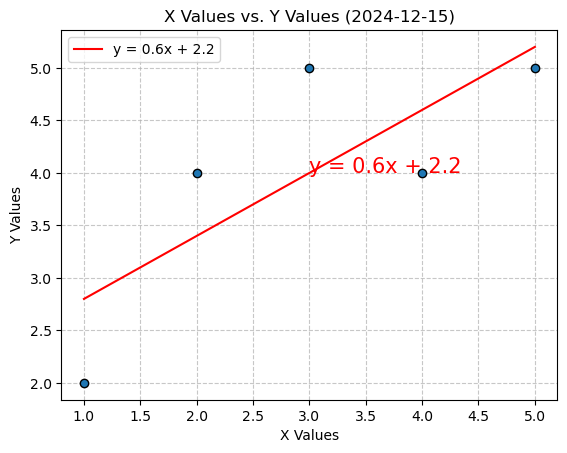

In [45]:

from scipy import stats
import datetime

# Define today's date
today = datetime.date.today()

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Define the function to create the plot
def create_linear_regression(x, y, x_titles, y_titles):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    print(line_eq)

    plt.scatter(x, y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})")
    plt.plot(x, regress_values, "r-", label=line_eq)
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7)
    plt.gca().set_axisbelow(True)
    plt.annotate(line_eq, (x.mean(), y.mean()), fontsize=15, color="red")
    plt.legend()
    plt.show()

# Call the function
create_linear_regression(x, y, "X Values", "Y Values")


In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,1.45,60,0,3.09,US,1734283529
3,bonthe,7.5264,-12.5050,30.16,61,5,5.71,SL,1734283535
4,wailua homesteads,22.0669,-159.3780,22.44,94,75,4.63,US,1734283536
5,college,64.8569,-147.8028,-31.01,54,20,0.00,US,1734283538
7,weno,7.4515,151.8468,26.97,89,75,4.63,FM,1734283540


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,19.25,45,75,10.29,CL,1734283531
2,broken hill,-31.9500,141.4333,30.78,17,8,5.17,AU,1734283532
6,acarau,-2.8856,-40.1200,30.56,58,15,7.28,BR,1734283539
8,grytviken,-54.2811,-36.5092,6.07,71,41,0.43,GS,1734283542
9,avarua,-21.2078,-159.7750,26.03,89,75,5.14,CK,1734283543


###  Temperature vs. Latitude Linear Regression Plot

r-value  :  -0.8531441704653787 
p-value  :  2.218975938854959e-115 
std-error:  0.02334370238378757
y = -0.76x + 35.08


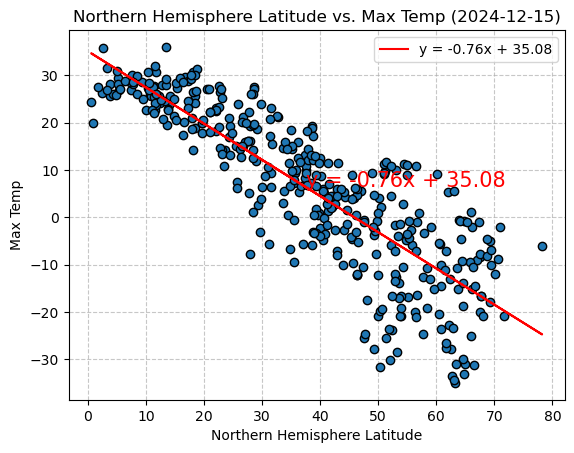

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' )

r-value  :  0.5266345241223455 
p-value  :  7.200260018635882e-13 
std-error:  0.029063048878439225
y = 0.23x + 28.94


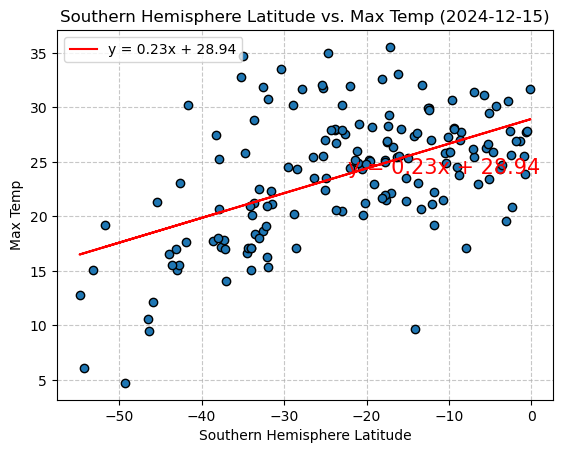

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp')

**Discussion about the linear relationship:** what i can gather from the data is generaly the further from the equater ( Lat 0 ) you get the lower the max temp reached is.

### Humidity vs. Latitude Linear Regression Plot

r-value  :  0.45558485065250903 
p-value  :  4.792208312020144e-22 
std-error:  0.055471558529352344
y = 0.57x + 49.7


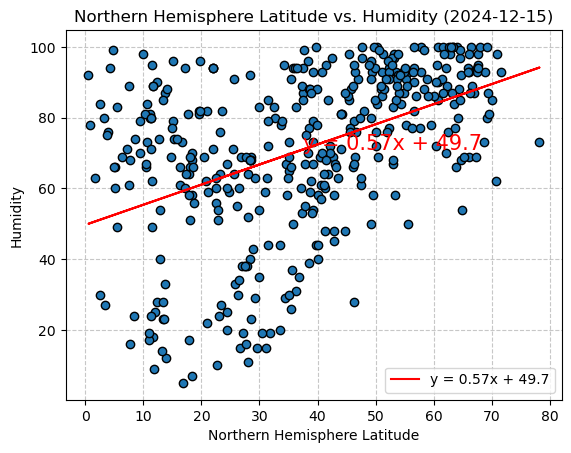

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity')

r-value  :  0.2131805828304964 
p-value  :  0.0066242651573696016 
std-error:  0.12366048789806464
y = 0.34x + 75.58


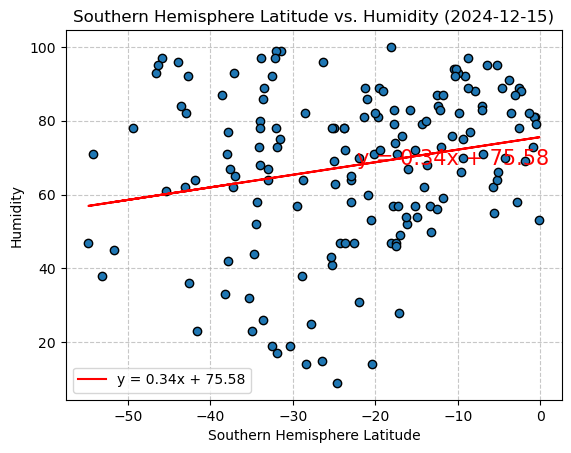

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Humidity')

**Discussion about the linear relationship:** i feel there is a lack of corrilation between distance from the equater and hummidity levels. most likely driven by other circumstances like eleavation and biom 

### Cloudiness vs. Latitude Linear Regression Plot

r-value  :  0.37007290176755875 
p-value  :  1.5851670518539732e-14 
std-error:  0.097030516773306
y = 0.77x + 28.19


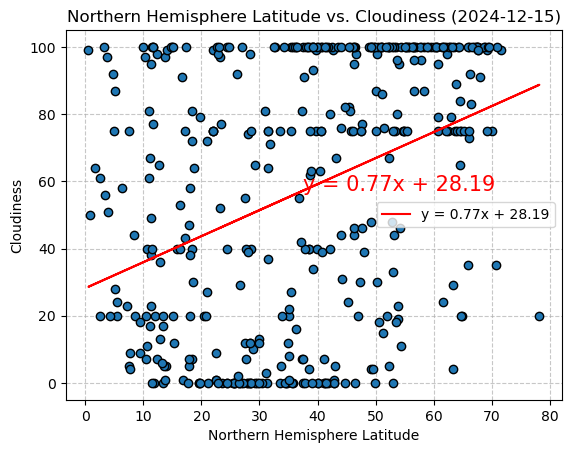

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness')

r-value  :  0.1927484526037916 
p-value  :  0.014298991366597496 
std-error:  0.20766049554976573
y = 0.51x + 71.17


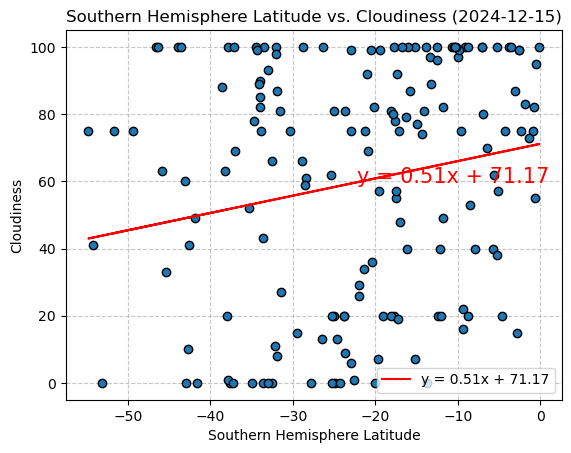

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Cloudiness')

**Discussion about the linear relationship:** based on tthe data the further from the equater you are (especially in the northern hemisphere ) the more cloudiness you are likely to encounter

### Wind Speed vs. Latitude Linear Regression Plot

r-value  :  0.04620086635093097 
p-value  :  0.3549195709821996 
std-error:  0.007813254775254033
y = 0.01x + 3.84


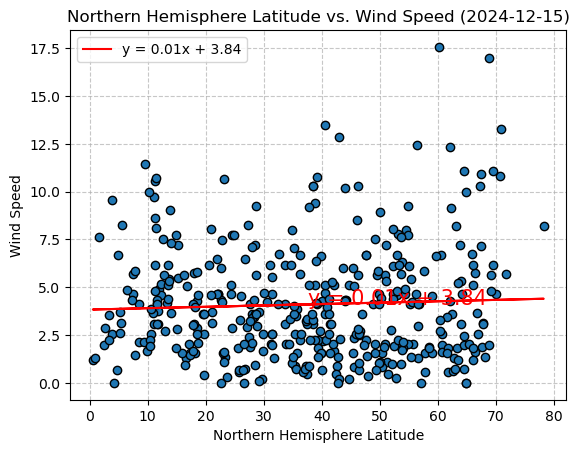

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

r-value  :  0.04620086635093097 
p-value  :  0.3549195709821996 
std-error:  0.007813254775254033
y = 0.01x + 3.84


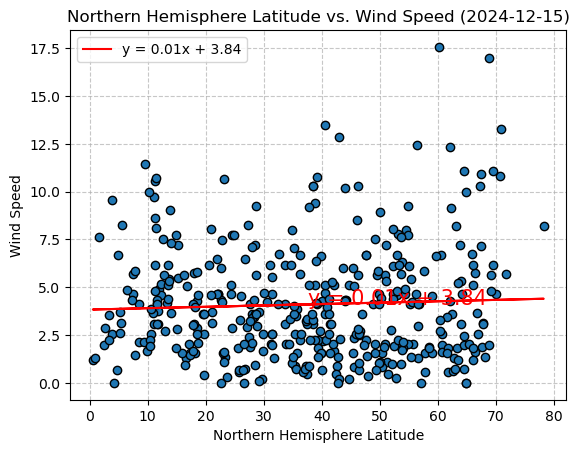

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

**Discussion about the linear relationship:** i feel there is a lack of corrilation between distance from the equater and wind speed levels. most likely driven by other circumstances 